# <center>**Flight Delay Predictions**</center>

<center><img src="https://www.webintravel.com/wp-content/uploads/2020/05/den-belitsky-GettyImages-854673918-scaled.jpg" width="700"></center>

### Link to Dataset: [flights.csv](https://www.kaggle.com/usdot/flight-delays?select=flights.csv)

### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

### Getting Data

In [ ]:
flights = pd.read_csv('/content/flights.csv')
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134828,2015,1,9,5,MQ,3112,N625MQ,DFW,CRP,1415,1409.0,-6.0,15.0,1424.0,77,86.0,67.0,354,1531.0,4.0,1532,1535.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
134829,2015,1,9,5,MQ,3693,N634MQ,DFW,LIT,1415,1414.0,-1.0,28.0,1442.0,68,76.0,44.0,304,1526.0,4.0,1523,1530.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
134830,2015,1,9,5,OO,3446,N227AG,SEA,ONT,1415,1408.0,-7.0,14.0,1422.0,149,157.0,139.0,956,1641.0,4.0,1644,1645.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
134831,2015,1,9,5,OO,2580,N465SW,SAN,LAX,1415,1411.0,-4.0,17.0,1428.0,45,50.0,25.0,109,1453.0,8.0,1500,1501.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Insight into the Data

In [ ]:
# selecting a section from the dataframe
flights_needed_data = flights[0:100000]

In [ ]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,1102.0,-6.0,23.0,1125.0,71,66.0,40.0,238,1205.0,3.0,1219,1208.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,1117.0,9.0,11.0,1128.0,274,267.0,248.0,2176,1836.0,8.0,1842,1844.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,1101.0,-7.0,28.0,1129.0,77,91.0,59.0,238,1228.0,4.0,1225,1232.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,1116.0,7.0,26.0,1142.0,165,157.0,123.0,1005,1445.0,8.0,1454,1453.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  int64  
 15  ELAPSED_TIME      

In [ ]:
# no. of flights which were diverted
flights_needed_data.value_counts('DIVERTED')

DIVERTED
0.0    99776
1.0      224
dtype: int64

### Data Visualisation

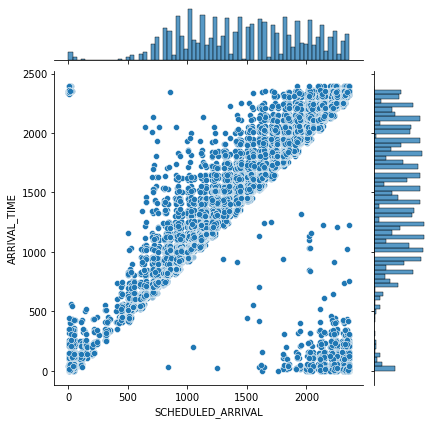

In [ ]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [ ]:
# using Pearson's correlation method
corr = flights_needed_data.corr(method='pearson')

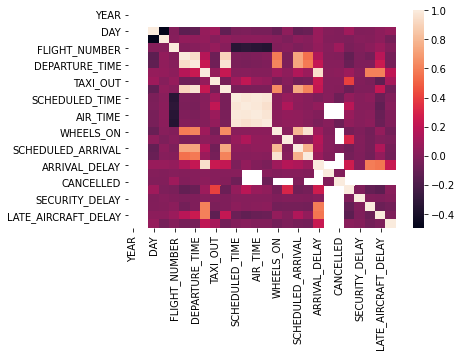

In [ ]:
sb.heatmap(corr)

In [ ]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,-0.026285,-0.018470,-0.036330,-0.035208,-0.095731,0.037407,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,0.019755,0.029025,0.030678,0.024666,0.013749,-0.017789,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,-0.337801,-0.318819,-0.339135,-0.356196,-0.003670,0.014464,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,-0.003027,1.000000,0.943186,0.174254,-0.081496,0.912232,-0.019873,-0.025744,-0.011993,0.000321,0.585786,-0.027502,0.731240,0.552653,0.154951,0.002515,-0.002631,-0.112393,-0.017957,-0.054419,0.186286,-0.042004
DEPARTURE_TIME,NaN,NaN,-0.124369,0.045182,0.010140,0.943186,1.000000,0.243960,-0.070081,0.966477,-0.031873,-0.035204,-0.024384,-0.016562,0.618850,-0.017759,0.734970,0.584615,0.223654,0.006576,0.009679,-0.093096,-0.012820,-0.013304,0.247325,-0.046406
DEPARTURE_DELAY,NaN,NaN,0.060064,0.055632,0.034863,0.174254,0.243960,1.000000,0.061905,0.231399,0.005868,0.015257,0.002733,0.004591,0.090696,0.040285,0.155150,0.079639,0.950838,0.020787,0.030862,0.085794,0.008040,0.606954,0.605289,0.210402
TAXI_OUT,NaN,NaN,0.093451,0.007291,0.061010,-0.081496,-0.070081,0.061905,1.000000,-0.043114,0.096191,0.215749,0.077234,0.057871,-0.045096,0.009041,-0.062325,-0.045611,0.245363,0.009810,0.010763,0.407371,-0.008021,-0.024674,-0.129879,0.119412
WHEELS_OFF,NaN,NaN,-0.119781,0.044150,0.016377,0.912232,0.966477,0.231399,-0.043114,1.000000,-0.038173,-0.038217,-0.031646,-0.027282,0.642358,-0.015089,0.744697,0.608611,0.217344,0.006524,0.001293,-0.085582,-0.013912,-0.017376,0.223010,-0.055273


### Data Preprocessing

In [ ]:
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [ ]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,1208.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99996,1,7,LAS,PHL,1108,9.0,1842,1844.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99997,1,7,SFO,BFL,1108,-7.0,1225,1232.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99998,1,7,ORD,MCO,1109,7.0,1454,1453.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replacing NaN values with the mean of the attribute
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

In [ ]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,1208.0,-11.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
99996,1,7,LAS,PHL,1108,9.0,1842,1844.0,2.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
99997,1,7,SFO,BFL,1108,-7.0,1225,1232.0,7.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
99998,1,7,ORD,MCO,1109,7.0,1454,1453.0,-1.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971


In [ ]:
result=[]

In [ ]:
# if the delay in flight's arrival is more than 15 mins, then it's definitely delayed
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [ ]:
flights_needed_data['result'] = result

In [ ]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,1208.0,-11.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,LAS,PHL,1108,9.0,1842,1844.0,2.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,SFO,BFL,1108,-7.0,1225,1232.0,7.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,ORD,MCO,1109,7.0,1454,1453.0,-1.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
flights_needed_data.value_counts('result')

result
0    63779
1    36221
dtype: int64

In [ ]:
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,10,-8.0,750,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,20,-2.0,806,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,20,-5.0,805,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,25,-1.0,320,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108,-6.0,1219,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,1108,9.0,1842,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,1108,-7.0,1225,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,1109,7.0,1454,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0


### Splitting Data for Training and Testing

In [ ]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

### Standardizing 

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

### Applying Decision Tree Classifier on Training Data

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions and Checking Accuracy

In [ ]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9977479115791175

### <center>Predictions are 99.77% accurate.</center>

### Getting the pkl File

In [53]:
from sklearn.externals import joblib 
  
# saving the model as a pickle in a file 
joblib.dump(clf, 'FlightDelayPredictionModel.pkl') 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['FlightDelayPredictionModel.pkl']